In [2]:
import pandas as pd
from utils import *
import numpy as np
from concurrent.futures import ProcessPoolExecutor
import time
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
in_dir = 'out/113_114_115/'
NUM_SENTENCE = 6

In [3]:
def extra_clean(s):
    END_TOKENS = ['.', '!', '?', '...', "'", "`", '"',")"]
    s_new = s.strip().replace('``', '"').replace("''", '"').replace('-LRB-', '(').replace('-RRB-', ')')
    if s_new[-1] in END_TOKENS: return s_new
    return s_new + "."

In [4]:
def get_bill(data):
    i, row = data
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    
    # get, clean, and save bill
    bill_path = in_dir + 'BILL_' + bill + '.out'
    with open(bill_path) as f:
        bill_text = f.readlines()
    num_bill_sentences = len(bill_text)
    clean_bill = '\n'.join([extra_clean(i) for i in bill_text])
    bill_dict['bill_text'] = clean_bill
    bill_dict['bill_text_clean'] = ' '.join(clean_bill.split('\n'))
    bill_dict['bill_length'] = num_bill_sentences
    
    # get, clean, and save CRS summary
    summ_path = in_dir + 'SUMMARY_' + bill + '.out'
    with open(summ_path) as f:
        summ_text = f.readlines()
    num_summ_sentences = len(summ_text)
    clean_summ = '\n'.join([extra_clean(i) for i in summ_text])
    bill_dict['CRS_summary'] = clean_summ
    bill_dict['CRS_summary_clean'] = ' '.join(clean_summ.split('\n'))
    bill_dict['summ_length'] = num_summ_sentences
    
    return bill_dict

In [5]:
def get_KL(data):
    i, row = data
    clean_bill = row.bill_text
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    num_bill_sentences = row.bill_length
    clean_summ = row.CRS_summary
    
    if num_bill_sentences < 300:
        
        # create and save automatic summaries
        summary_KL = run_sumy(text = clean_bill, algo='KL', sent_count=NUM_SENTENCE)
        summary_KL_clean = ' '.join([str(sentence) for sentence in summary_KL])
        bill_dict['KL_summary'] = summary_KL_clean

        # evaluate automatic summaries
        CRS_sumy = convert_summary(clean_summ)
        rouge_KL = eval_sumy(summary_KL, CRS_sumy)
        bill_dict['KL_rouge_dict'] = rouge_KL
        bill_dict['KL_rouge1'] = rouge_KL['rouge1_recall']
    
    return bill_dict

In [44]:
def get_LR(data):
    i, row = data
    clean_bill = row.bill_text
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    num_bill_sentences = row.bill_length
    clean_summ = row.CRS_summary
    
    if num_bill_sentences < 300:
        
        # create and save automatic summaries
        summary_LR = run_sumy(text = clean_bill, algo='LexRank', sent_count=NUM_SENTENCE)
        summary_LR_clean = ' '.join([str(sentence) for sentence in summary_LR])
        bill_dict['LR_summary'] = summary_LR_clean

        # evaluate automatic summaries
        CRS_sumy = convert_summary(clean_summ)
        rouge_LR = eval_sumy(summary_LR, CRS_sumy)
        bill_dict['LR_rouge_dict'] = rouge_LR
        bill_dict['LR_rouge1'] = rouge_LR['rouge1_recall']
        
    return bill_dict

In [7]:
dev = pd.read_csv('./out/validate_113_114_115.csv')
test = pd.read_csv('./out/test_113_114_115.csv')

#### Dev Data

###### Get Bill Data

In [8]:
# counts = range(1, len(dev)+1)
# dev_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_bill, dev.iterrows())):
#         dev_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(dev)))

In [9]:
# dev_bills = pd.DataFrame(dev_dicts)

###### KL Summaries

In [10]:
# counts = range(1, len(dev_bills)+1)
# dev_kl_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_KL, dev_bills.iterrows())):
#         dev_kl_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(dev_bills)))

In [11]:
# dev_KL = pd.DataFrame(dev_kl_dicts)
# dev_bills = dev_bills.merge(dev_KL, on='ID')

###### LR Summaries

In [12]:
# counts = range(1, len(dev_bills)+1)
# dev_lr_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_LR, dev_bills.iterrows())):
#         dev_lr_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(dev_bills)))

In [13]:
# dev_LR = pd.DataFrame(dev_lr_dicts)
# dev_bills = dev_bills.merge(dev_LR, on='ID')

In [14]:
# dev_bills.to_csv('dev_kl_lr.csv')

In [15]:
dev_bills = pd.read_csv('dev_kl_lr.csv')

#### Test Data

###### Get Bill Data

In [16]:
# counts = range(1, len(test)+1)
# test_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_bill, test.iterrows())):
#         test_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(test)))

100/2307 bills
200/2307 bills
300/2307 bills
400/2307 bills
500/2307 bills
600/2307 bills
700/2307 bills
800/2307 bills
900/2307 bills
1000/2307 bills
1100/2307 bills
1200/2307 bills
1300/2307 bills
1400/2307 bills
1500/2307 bills
1600/2307 bills
1700/2307 bills
1800/2307 bills
1900/2307 bills
2000/2307 bills
2100/2307 bills
2200/2307 bills
2300/2307 bills


In [17]:
# test_bills = pd.DataFrame(test_dicts)

###### KL Summaries

In [23]:
# counts = range(1, len(test_bills)+1)
# test_kl_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_KL, test_bills.iterrows())):
#         test_kl_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(test_bills)))

100/2307 bills
200/2307 bills
300/2307 bills
400/2307 bills
500/2307 bills
600/2307 bills
700/2307 bills
800/2307 bills
900/2307 bills
1000/2307 bills
1100/2307 bills
1200/2307 bills
1300/2307 bills
1400/2307 bills
1500/2307 bills
1600/2307 bills
1700/2307 bills
1800/2307 bills
1900/2307 bills
2000/2307 bills
2100/2307 bills
2200/2307 bills
2300/2307 bills


In [24]:
# test_KL = pd.DataFrame(test_kl_dicts)
# test_bills = test_bills.merge(test_KL, on='ID')

###### LR Summaries

In [46]:
# test_lr_dicts = []
# for i in range(len(test_bills)):
#     bill_dict = get_LR((i, test_bills.iloc[i]))
#     test_lr_dicts.append(bill_dict)
#     if i % 100 == 0:
#         print('{}/{} bills'.format(i, len(test_bills)))

0/2307 bills
100/2307 bills
200/2307 bills
300/2307 bills
400/2307 bills
500/2307 bills
600/2307 bills
700/2307 bills
800/2307 bills
900/2307 bills
1000/2307 bills
1100/2307 bills
1200/2307 bills
1300/2307 bills
1400/2307 bills
1500/2307 bills
1600/2307 bills
1700/2307 bills
1800/2307 bills
1900/2307 bills
2000/2307 bills
2100/2307 bills
2200/2307 bills
2300/2307 bills


In [47]:
# test_LR = pd.DataFrame(test_lr_dicts)
# test_bills = test_bills.merge(test_LR, on='ID')

In [49]:
# test_bills.to_csv('test_kl_lr.csv')

In [30]:
test_bills = pd.read_csv('test_kl_lr.csv')

#### Stats

In [48]:
print('Number of sentences')
print('\nValidation set \n\tMean: {} \n\tStandard deviation: {}'.format(dev_bills.bill_length.mean(), dev_bills.bill_length.std()))
print('\nTest set \n\tMean: {} \n\tStandard deviation: {}'.format(test_bills.bill_length.mean(), test_bills.bill_length.std()))

Number of sentences

Validation set 
	Mean: 108.37727666955767 
	Standard deviation: 471.88677259190126

Test set 
	Mean: 108.03901170351105 
	Standard deviation: 579.7745802971876


#### Stupid Cleaning

In [55]:
import ast

In [59]:
def get_rouge(row, algo, rouge_value):
    if algo == 'KL':
        try:
            rouge_dict = ast.literal_eval(row.KL_rouge_dict)
        except:
            return None
    elif algo == 'LR':
        try:
            rouge_dict = ast.literal_eval(row.LR_rouge_dict)
        except:
            return None
    else:
        raise 'incorrect algo'
    return rouge_dict[rouge_value]

In [61]:
test_bills['KL_rouge2'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_recall'), axis=1)
test_bills['KL_rougeL'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_recall'), axis=1)
test_bills['LR_rouge2'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_recall'), axis=1)
test_bills['LR_rougeL'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_recall'), axis=1)

In [62]:
test_bills['KL_rouge1_P'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge1_precision'), axis=1)
test_bills['KL_rouge2_P'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_precision'), axis=1)
test_bills['KL_rougeL_P'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_precision'), axis=1)
test_bills['LR_rouge1_P'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge1_precision'), axis=1)
test_bills['LR_rouge2_P'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_precision'), axis=1)
test_bills['LR_rougeL_P'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_precision'), axis=1)

In [63]:
test_bills['KL_rouge1_F'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge1_f'), axis=1)
test_bills['KL_rouge2_F'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_f'), axis=1)
test_bills['KL_rougeL_F'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_F'), axis=1)
test_bills['LR_rouge1_F'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge1_f'), axis=1)
test_bills['LR_rouge2_F'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_f'), axis=1)
test_bills['LR_rougeL_F'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_F'), axis=1)

In [64]:
test_bills

,Unnamed: 0,CRS_summary,CRS_summary_clean,ID,bill_length,bill_text,bill_text_clean,summ_length,KL_rouge1,KL_rouge_dict,...,KL_rougeL_P,LR_rouge1_P,LR_rouge2_P,LR_rougeL_P,KL_rouge1_F,KL_rouge2_F,KL_rougeL_F,LR_rouge1_F,LR_rouge2_F,LR_rougeL_F
0,0,Pay What You Owe Before You Go Act - Amends th...,Pay What You Owe Before You Go Act - Amends th...,113_S2895_IS,25,To amend the Internal Revenue Code to include ...,To amend the Internal Revenue Code to include ...,1,0.395349,"{'rouge1_precision': 0.4722222222222222, 'roug...",...,0.444444,0.284091,0.126506,0.120482,0.430380,0.310680,0.447943,0.381679,0.188341,0.126006
1,1,United States-Turkey Free Trade Promotion Act ...,United States-Turkey Free Trade Promotion Act ...,114_HR3685_IH,21,To direct the United States Trade Representati...,To direct the United States Trade Representati...,2,0.615385,"{'rouge1_precision': 0.2891566265060241, 'roug...",...,0.175573,0.384615,0.256881,0.212500,0.393443,0.283871,0.188644,0.512821,0.368421,0.224319
2,2,(Sec. 1) This bill revises cost-sharing under ...,(Sec. 1) This bill revises cost-sharing under ...,114_S2616_IS,16,To modify certain cost-sharing and revenue pro...,To modify certain cost-sharing and revenue pro...,4,0.257143,"{'rouge1_precision': 0.47368421052631576, 'rou...",...,0.436364,0.523810,0.382114,0.455621,0.333333,0.227451,0.213975,0.465608,0.310231,0.346647
3,3,EB-5 Integrity Act of 2016.\nThis bill amends ...,EB-5 Integrity Act of 2016. This bill amends t...,114_HR4530_IH,368,To implement integrity measures to strengthen ...,To implement integrity measures to strengthen ...,19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Directs the Comptroller General (GAO), beginni...","Directs the Comptroller General (GAO), beginni...",113_S774_IS,30,To require the Comptroller General of the Unit...,To require the Comptroller General of the Unit...,3,0.274074,"{'rouge1_precision': 0.8043478260869565, 'roug...",...,0.700935,0.644068,0.444444,0.409091,0.408840,0.305556,0.266650,0.600791,0.390244,0.354530
5,5,Veterans Conservation Corps Act of 2015.\nDire...,Veterans Conservation Corps Act of 2015. Direc...,114_HR1978_IH,77,To require the Secretary of Veterans Affairs t...,To require the Secretary of Veterans Affairs t...,6,0.373984,"{'rouge1_precision': 0.5111111111111111, 'roug...",...,0.297619,0.688679,0.470588,0.336310,0.431925,0.251534,0.221906,0.637555,0.453608,0.369818
6,6,Veteran Entrepreneurship and Training Opportun...,Veteran Entrepreneurship and Training Opportun...,113_S2396_IS,307,To establish the veterans ' business outreach ...,To establish the veterans ' business outreach ...,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Natomas Basin Flood Protection Improvements Ac...,Natomas Basin Flood Protection Improvements Ac...,113_S197_IS,13,To authorize improvements to flood damage redu...,To authorize improvements to flood damage redu...,1,0.346939,"{'rouge1_precision': 0.5, 'rougeL_recall': 0.2...",...,0.357143,0.396825,0.276316,0.224719,0.409639,0.209524,0.229743,0.446429,0.295775,0.242233
8,8,Cruise Passenger Protection Act.\nThis bill di...,Cruise Passenger Protection Act. This bill dir...,115_HR2173_IH,180,To improve passenger vessel security and safet...,To improve passenger vessel security and safet...,11,0.087179,"{'rouge1_precision': 0.22077922077922077, 'rou...",...,0.158371,0.503030,0.292254,0.316456,0.125000,0.013274,0.103273,0.461111,0.272131,0.322722
9,9,Directs the Speaker of the House of Representa...,Directs the Speaker of the House of Representa...,113_HR750_IH,45,To award posthumously a Congressional Gold Med...,To award posthumously a Congressional Gold Med...,1,0.595745,"{'rouge1_precision': 0.224, 'rougeL_recall': 0...",...,0.185792,0.362069,0.339506,0.349727,0.325581,0.264957,0.201689,0.515337,0.482456,0.379649


#### Pointer Generator

In [1]:
in_dir = '../decode_test_400maxenc_4beam_35mindec_100maxdec_ckpt-27375/'

In [9]:
all_results = []
for filename in os.listdir(in_dir+'decoded/'):
    this_result = {}
    bill_id = filename.split('_')[0]
    this_result['id'] = bill_id
    with open(in_dir+'decoded/'+filename) as f:
        model_summary = f.readlines()
    this_result['model_summary'] = ' '.join(model_summary)
    with open(in_dir+'reference/'+bill_id+'_reference.txt') as f:
        ref_summary = f.readlines()
    this_result['ref_summary'] = ' '.join(ref_summary)
    all_results.append(this_result)

In [23]:
see_results = pd.DataFrame(all_results)

In [11]:
see_results.head()

,id,model_summary,ref_summary
0,000000,pay what you owe before you go act .\n this bi...,pay what you owe before you go act - amends th...
1,000001,united states-turkey free trade promotion act ...,united states-turkey free trade promotion act ...
2,000002,directs the secretary of the interior to submi...,(sec. 1) this bill revises cost-sharing under ...
3,000003,eb-5 integrity act of 2016 .\n this bill amend...,eb-5 integrity act of 2016 .\n this bill amend...
4,000004,directs the comptroller general (gao) to prepa...,"directs the comptroller general (gao), beginni..."


In [12]:
see_results.model_summary.iloc[0]

"pay what you owe before you go act .\n this bill amends the internal revenue code, with respect to the recapture of unrepatriated earnings of groups including an inverted service, to include in the taxpayer's income of any applicable controlled foreign corporation for its last taxable year ending before the acquisition date shall be increased by the accumulated deferred foreign income of the treasury."

In [15]:
def eval_see(row):
    ref_summ = convert_summary(row.ref_summary)
    model_summ = convert_summary(row.model_summary)
    rouge_see = eval_sumy(model_summ, ref_summ)
    return rouge_see

In [18]:
all_rouge = []
for i in range(len(see_results)):
    this_rouge = eval_see(see_results.iloc[i])
    all_rouge.append(this_rouge)
    if i % 100 == 0:
        print('{}/{}'.format(i, len(see_results)))

0/2307
100/2307
200/2307
300/2307
400/2307
500/2307
600/2307
700/2307
800/2307
900/2307
1000/2307
1100/2307
1200/2307
1300/2307
1400/2307
1500/2307
1600/2307
1700/2307
1800/2307
1900/2307
2000/2307
2100/2307
2200/2307
2300/2307


In [24]:
see_results = pd.concat([see_results, pd.DataFrame(all_rouge)], axis=1)

In [25]:
see_results.head()

,id,model_summary,ref_summary,rouge1_f,rouge1_precision,rouge1_recall,rouge2_f,rouge2_precision,rouge2_recall,rougeL_F,rougeL_precision,rougeL_recall
0,000000,pay what you owe before you go act .\n this bi...,pay what you owe before you go act - amends th...,0.602151,0.560000,0.651163,0.427350,0.416667,0.438596,0.479939,0.476190,0.483871
1,000001,united states-turkey free trade promotion act ...,united states-turkey free trade promotion act ...,0.655738,0.833333,0.540541,0.540541,0.625000,0.476190,0.582090,0.685714,0.533333
2,000002,directs the secretary of the interior to submi...,(sec. 1) this bill revises cost-sharing under ...,0.402878,0.800000,0.269231,0.266667,0.666667,0.166667,0.163914,0.709091,0.157895
3,000003,eb-5 integrity act of 2016 .\n this bill amend...,eb-5 integrity act of 2016 .\n this bill amend...,0.183333,0.666667,0.106280,0.083130,0.404762,0.046322,0.064507,0.636364,0.063927
4,000004,directs the comptroller general (gao) to prepa...,"directs the comptroller general (gao), beginni...",0.409357,0.897436,0.265152,0.266667,0.690909,0.165217,0.163939,0.750000,0.158416


In [28]:
metrics = ['rouge1_recall', 'rouge2_recall', 'rougeL_recall', 'rouge1_precision', 'rouge2_precision', 'rougeL_precision', 'rouge1_f', 'rouge2_f', 'rougeL_F',]
for metric in metrics:
    print('{}: mean {}, std dev {}'.format(metric, see_results[metric].mean(), see_results[metric].std()))

rouge1_recall: mean 0.4069074029647197, std dev 0.22088675559526322
rouge2_recall: mean 0.27684808710693326, std dev 0.20748453568205644
rougeL_recall: mean 0.33726016025148703, std dev 0.22191513267645335
rouge1_precision: mean 0.7162435402540865, std dev 0.15708917218243781
rouge2_precision: mean 0.5053435055048937, std dev 0.1902930977885961
rougeL_precision: mean 0.5632370551761552, std dev 0.1721038722458745
rouge1_f: mean 0.480515204835561, std dev 0.18996976204498695
rouge2_f: mean 0.3224288430960793, std dev 0.18697982526306883
rougeL_F: mean 0.32278362697796487, std dev 0.1889794637587124


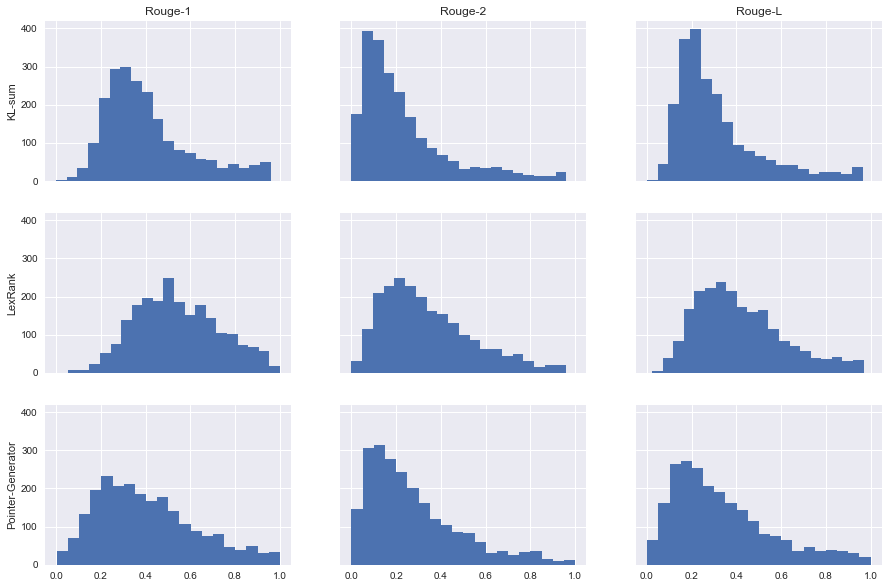

In [65]:
plt.style.use('seaborn')
fig, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True, sharey=True)
test_bills.KL_rouge1.hist(bins=20, ax=ax[0,0])
test_bills.KL_rouge2.hist(bins=20, ax=ax[0,1])
test_bills.KL_rougeL.hist(bins=20, ax=ax[0,2])
test_bills.LR_rouge1.hist(bins=20, ax=ax[1,0])
test_bills.LR_rouge2.hist(bins=20, ax=ax[1,1])
test_bills.LR_rougeL.hist(bins=20, ax=ax[1,2])
see_results.rouge1_recall.hist(bins=20, ax=ax[2,0])
see_results.rouge2_recall.hist(bins=20, ax=ax[2,1])
see_results.rougeL_recall.hist(bins=20, ax=ax[2,2])
ax[0,0].set_ylabel('KL-sum')
ax[1,0].set_ylabel('LexRank')
ax[2,0].set_ylabel('Pointer-Generator')
ax[0,0].set_title('Rouge-1')
ax[0,1].set_title('Rouge-2')
ax[0,2].set_title('Rouge-L')
plt.show()

In [91]:
metrics = ['KL_rouge1', 'KL_rouge2', 'KL_rougeL', 'LR_rouge1', 'LR_rouge2', 'LR_rougeL',
          'KL_rouge1_P', 'KL_rouge2_P', 'KL_rougeL_P', 'LR_rouge1_P', 'LR_rouge2_P', 'LR_rougeL_P',
          'KL_rouge1_F', 'KL_rouge2_F', 'KL_rougeL_F', 'LR_rouge1_F', 'LR_rouge2_F', 'LR_rougeL_F',]
for metric in metrics:
    print('{}: mean {}, std dev {}'.format(metric, test_bills[metric].mean(), test_bills[metric].std()))

KL_rouge1: mean 0.4085841104282545, std dev 0.19336888440152306
KL_rouge2: mean 0.23263455521588702, std dev 0.19925127585179214
KL_rougeL: mean 0.3136355462180281, std dev 0.19061786683168852
LR_rouge1: mean 0.5425553923000387, std dev 0.1878182089693503
LR_rouge2: mean 0.3401927956938935, std dev 0.20231607405959814
LR_rougeL: mean 0.4175673675970298, std dev 0.1966441662414667
KL_rouge1_P: mean 0.38759151384206464, std dev 0.14853923569612146
KL_rouge2_P: mean 0.20997843180311165, std dev 0.13977260582494241
KL_rougeL_P: mean 0.2614266473215968, std dev 0.12789598905640104
LR_rouge1_P: mean 0.39769003646625495, std dev 0.13402333900411947
LR_rouge2_P: mean 0.22427195413555015, std dev 0.11729779926565878
LR_rougeL_P: mean 0.2480889948308329, std dev 0.10876001765519314
KL_rouge1_F: mean 0.3685829637269611, std dev 0.1205262451655499
KL_rouge2_F: mean 0.19740595795792892, std dev 0.1283010355519521
KL_rougeL_F: mean 0.2229327252099482, std dev 0.10181155995029852
LR_rouge1_F: mean 0.

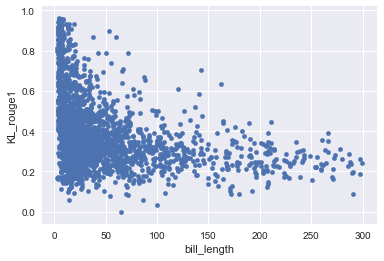

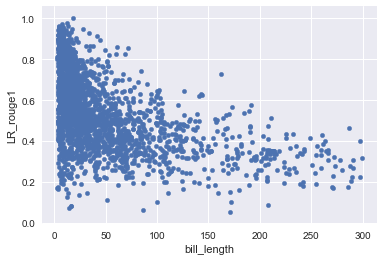

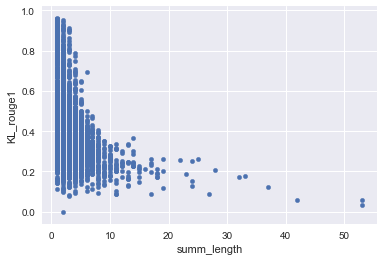

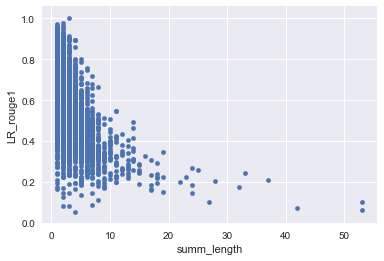

In [98]:
test_bills.plot(x='bill_length', y='KL_rouge1', kind='scatter')
test_bills.plot(x='bill_length', y='LR_rouge1', kind='scatter')
test_bills.plot(x='summ_length', y='KL_rouge1', kind='scatter')
test_bills.plot(x='summ_length', y='LR_rouge1', kind='scatter')